# Proportion Correct Analysis: Discrim and VE

In [46]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression
import pickle
import seaborn as sns


In [48]:
VE_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/matched/VE_data.pickle'

with open(VE_data_path, 'rb') as handle:
    VE_data = pickle.load(handle)

In [49]:
TAC_trial_plot_data = VE_data

## Execute this cell to prep for plotting
TAC_final_x_250 = TAC_trial_plot_data[0][0]
TAC_final_y_250 = TAC_trial_plot_data[1][0]
TAC_ste_250 = TAC_trial_plot_data[2][0]
TAC_stim_250 = TAC_trial_plot_data[3][0]
TAC_std_250 = TAC_trial_plot_data[4][0]
TAC_RT_250 = TAC_trial_plot_data[5][0]
TAC_nl_RT_250 = TAC_trial_plot_data[6][0]


TAC_final_x_500 = TAC_trial_plot_data[0][1]
TAC_final_y_500 = TAC_trial_plot_data[1][1]
TAC_ste_500 = TAC_trial_plot_data[2][1]
TAC_stim_500 = TAC_trial_plot_data[3][1]
TAC_std_500 = TAC_trial_plot_data[4][1]
TAC_RT_500 = TAC_trial_plot_data[5][1]
TAC_nl_RT_500 = TAC_trial_plot_data[6][1]


TAC_final_x_750 = TAC_trial_plot_data[0][2]
TAC_final_y_750 = TAC_trial_plot_data[1][2]
TAC_ste_750 = TAC_trial_plot_data[2][2]
TAC_stim_750 = TAC_trial_plot_data[3][2]
TAC_std_750 = TAC_trial_plot_data[4][2]
TAC_RT_750 = TAC_trial_plot_data[5][2]
TAC_nl_RT_750 = TAC_trial_plot_data[6][2]


TAC_final_x_1000 = TAC_trial_plot_data[0][3]
TAC_final_y_1000 = TAC_trial_plot_data[1][3]
TAC_ste_1000 = TAC_trial_plot_data[2][3]
TAC_stim_1000 = TAC_trial_plot_data[3][3]
TAC_std_1000 = TAC_trial_plot_data[4][3]
TAC_RT_1000 = TAC_trial_plot_data[5][3]
TAC_nl_RT_1000 = TAC_trial_plot_data[6][3]

In [36]:
discrimination_performance_path = '/Users/prachi/Documents/depth_duration/depth_discrimination/TAC_discrim_datafiles/matched_discrim_data/performance.pickle'

with open(discrimination_performance_path, 'rb') as handle:
    n_all_VE_discrim_performance = pickle.load(handle)
    

In [37]:
n_VE_estim_diff_250 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_250'] for elem in n_all_VE_discrim_performance]
n_VE_estim_diff_1000 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_1000'] for elem in n_all_VE_discrim_performance]

n_VE_accuracy_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][0] for elem in n_all_VE_discrim_performance]
n_VE_accuracy_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][0] for elem in n_all_VE_discrim_performance]

n_VE_ste_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][-2] for elem in n_all_VE_discrim_performance]
n_VE_ste_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][-2] for elem in n_all_VE_discrim_performance]

n_avg_RT_250 = [n_all_VE_discrim_performance[elem]['RT_250'][1] for elem in n_all_VE_discrim_performance]
n_avg_RT_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][1] for elem in n_all_VE_discrim_performance]

n_avg_RT_ste_250 = [n_all_VE_discrim_performance[elem]['RT_250'][-1] for elem in n_all_VE_discrim_performance]
n_avg_RT_ste_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][-1] for elem in n_all_VE_discrim_performance]


n_JV_250 = [n_all_VE_discrim_performance[elem]['JV_regressor_250'] for elem in n_all_VE_discrim_performance]
n_JV_1000 = [n_all_VE_discrim_performance[elem]['JV_regressor_1000'] for elem in n_all_VE_discrim_performance]

n_stim = [elem for elem in n_all_VE_discrim_performance]

In [32]:
with open('/Users/prachi/Documents/depth_duration/depth_discrimination/TAC_discrim_datafiles/matched_discrim_data/VE_250_Performance.pickle', 'rb') as handle:
    VE_250_Performance = pickle.load(handle)
    
with open('/Users/prachi/Documents/depth_duration/depth_discrimination/TAC_discrim_datafiles/matched_discrim_data/VE_1000_Performance.pickle', 'rb') as handle:
    VE_1000_Performance = pickle.load(handle)    
    

## VE PC x Discrim PC 

In [33]:
# Python code to count the number of occurrences
def countX(lst, x):
    return lst.count(x)

VE_250_PC = {}

for key in VE_250_Performance:
    performance = VE_250_Performance[key]
    correct_count = countX(performance, 0)
    incorrect_count = countX(performance, 1)
    total = len(performance)
    pc = correct_count/total
    VE_250_PC['depth_discrimination_stimuli/' + key] = pc
    
VE_250_PC['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png'] 


0.625

In [38]:
Discrim_VE_PC_250 = {}
all_stim_250 = []
all_VE_PC_250 = []
all_Discrim_VE_PC_250 = []

for key in VE_250_PC:
    im_VE_PC = VE_250_PC[key]
    im_Discrim_PC = n_all_VE_discrim_performance[key]['accuracy_250'][0]
    Discrim_VE_PC_250[key] = [im_VE_PC, im_Discrim_PC]
    
    all_stim_250.append(key)
    all_VE_PC_250.append(im_VE_PC)
    all_Discrim_VE_PC_250.append(im_Discrim_PC)
    
Discrim_VE_PC_250['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']



[0.625, 0.5116279069767442]

In [39]:
all_stim_250[0], all_VE_PC_250[0], all_Discrim_VE_PC_250[0]

('depth_discrimination_stimuli/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0-target.png',
 0.38461538461538464,
 0.4146341463414634)

m: [0.67461472]
b: 0.2450328819488461
R-squared:  0.31804462645855014


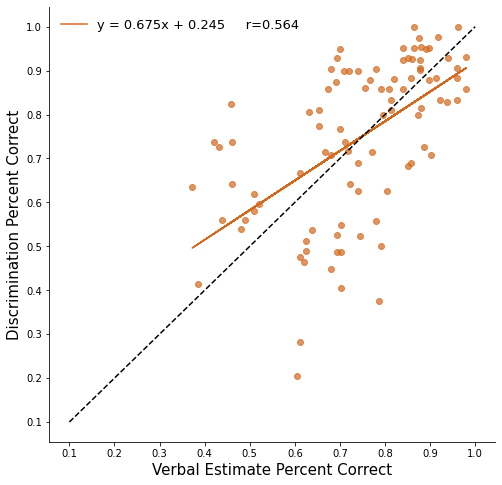

In [40]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(all_VE_PC_250).reshape(-1,1)
y_250 = np.array(all_Discrim_VE_PC_250)
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.plot(X_250, y_250, 'o', color='chocolate', alpha = 0.7);

r = np.sqrt(reg_250.score(X_250, y_250))

plt.plot(X_250,y_predicted_250,color='chocolate', label = 'y = ' + str(round(reg_250.coef_[0], 3)) + 'x + ' +  str(round(reg_250.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

x_perfacc = np.arange(0.1 ,1.1, 0.1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid

legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xlabel('Verbal Estimate Percent Correct', fontsize=15)
plt.ylabel('Discrimination Percent Correct', fontsize=15)

plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))



#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))

In [41]:
# Python code to count the number of occurrences
def countX(lst, x):
    return lst.count(x)

VE_1000_PC = {}

for key in VE_1000_Performance:
    performance = VE_1000_Performance[key]
    correct_count = countX(performance, 0)
    incorrect_count = countX(performance, 1)
    total = len(performance)
    pc = correct_count/total
    VE_1000_PC['depth_discrimination_stimuli/' + key] = pc
    
VE_1000_PC['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png'] 


0.5490196078431373

In [42]:
Discrim_VE_PC_1000 = {}
all_stim_1000 = []
all_VE_PC_1000 = []
all_Discrim_VE_PC_1000 = []

for key in VE_1000_PC:
    im_VE_PC = VE_1000_PC[key]
    im_Discrim_PC = n_all_VE_discrim_performance[key]['accuracy_1000'][0]
    Discrim_VE_PC_1000[key] = [im_VE_PC, im_Discrim_PC]
    
    all_stim_1000.append(key)
    all_VE_PC_1000.append(im_VE_PC)
    all_Discrim_VE_PC_1000.append(im_Discrim_PC)
    
Discrim_VE_PC_1000['depth_discrimination_stimuli/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5/001417_2014-06-19_16-25-36_260595134347_rgbf000115-resize_5-target.png']

[0.5490196078431373, 0.46511627906976744]

In [43]:
all_stim_1000[0], all_VE_PC_1000[0], all_Discrim_VE_PC_1000[0]

('depth_discrimination_stimuli/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0-target.png',
 0.3137254901960784,
 0.4878048780487805)

m: [0.80110911]
b: 0.16963246320907588
R-squared:  0.48257235764415707


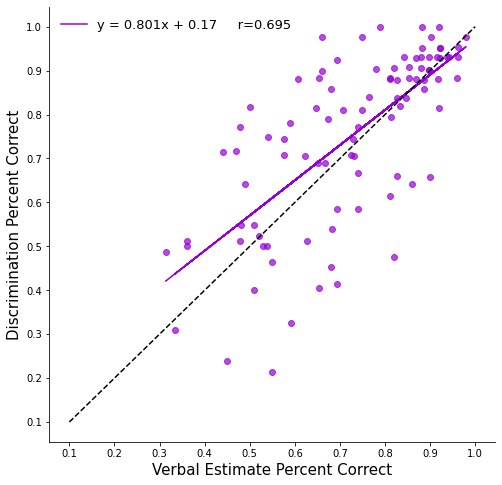

In [44]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])

right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(all_VE_PC_1000).reshape(-1,1)
y_1000 = np.array(all_Discrim_VE_PC_1000)
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values
plt.plot(X_1000, y_1000, 'o', color='darkviolet', alpha = 0.7);

r = np.sqrt(reg_1000.score(X_1000, y_1000))

plt.plot(X_1000,y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3)) + 'x + ' +  str(round(reg_1000.intercept_, 3))
         + '     r' + '=' +  str(round(float(r), 3)))

x_perfacc = np.arange(0.1 ,1.1, 0.1)
plt.plot(x_perfacc, x_perfacc, color = 'black',linestyle='--')  # solid

legend = plt.legend(loc = 0, fontsize = 13, labelspacing = 1, frameon=False)

plt.xlabel('Verbal Estimate Percent Correct', fontsize=15)
plt.ylabel('Discrimination Percent Correct', fontsize=15)

plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.yticks(np.arange(0.1, 1.1, 0.1))

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))

                 Discrim_PC_250  Discrim_PC_1000  VE_PC_250  VE_PC_1000
Discrim_PC_250         1.000000         0.718103   0.563954    0.599037
Discrim_PC_1000        0.718103         1.000000   0.589019    0.694674
VE_PC_250              0.563954         0.589019   1.000000    0.794817
VE_PC_1000             0.599037         0.694674   0.794817    1.000000


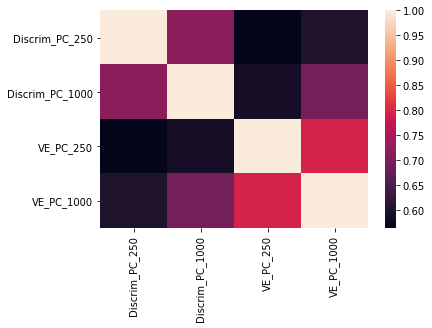

In [47]:
import pandas as pd

data = {'Discrim_PC_250': all_Discrim_VE_PC_250,
        'Discrim_PC_1000': all_Discrim_VE_PC_1000,
        'VE_PC_250': all_VE_PC_250,
        'VE_PC_1000': all_VE_PC_1000
        }

df = pd.DataFrame(data,columns=['Discrim_PC_250','Discrim_PC_1000','VE_PC_250', 'VE_PC_1000'])

sns.heatmap(df.corr());

print(df.corr())

In [63]:
all_stim_1000 == all_stim_250, all_stim_1000[0], len(all_stim_1000)

(True,
 'depth_discrimination_stimuli/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0/002509_2014-06-24_13-19-22_094959634447_rgbf000077-resize_0-target.png',
 94)

## VE RT x Discrim RT 

In [61]:
VE_stimfolders = [elem.split('/')[1] for elem in TAC_final_x_250]

VE_stimfolders[0], len(VE_stimfolders)

('002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2', 192)

In [65]:
arr_discrim250RT = []
arr_discrim1000RT = []
arr_VE250RT = []
arr_VE1000RT = []
stim_RT = []


for key in discrim_performance:
    stim_RT.append(key)
    im0 = key.split('/')[1]
    im1 = n_all_VE_discrim_performance[key]['stimulus_1'].split('/')[1]
    dtrial_250_RT = n_all_VE_discrim_performance[key]['RT_250'][1]
    arr_discrim250RT.append(dtrial_250_RT)
    dtrial_1000_RT = n_all_VE_discrim_performance[key]['RT_1000'][1]
    arr_discrim1000RT.append(dtrial_1000_RT)
    
    im0_VE_index = VE_stimfolders.index(im0)
    im1_VE_index = VE_stimfolders.index(im1)
    
    im0_VEtrial_250_RT = TAC_nl_RT_250[im0_VE_index]
    im1_VEtrial_250_RT = TAC_nl_RT_250[im1_VE_index]
    VE_sumRT_250 = im0_VEtrial_250_RT + im1_VEtrial_250_RT
    arr_VE250RT.append(VE_sumRT_250)
    
    im0_VEtrial_1000_RT = TAC_nl_RT_1000[im0_VE_index]
    im1_VEtrial_1000_RT = TAC_nl_RT_1000[im1_VE_index]
    VE_sumRT_1000 = im0_VEtrial_1000_RT + im1_VEtrial_1000_RT
    arr_VE1000RT.append(VE_sumRT_1000)
    
len(arr_discrim250RT), len(arr_discrim1000RT), len(arr_VE250RT), len(arr_VE1000RT)

(94, 94, 94, 94)

In [66]:
all_stim_1000 == all_stim_250 == stim_RT

True

m: [0.15101236]
b: 4.578323333550352
R-squared:  0.05375602158378745
(0.2318534485052718, 0.02454052821828666)


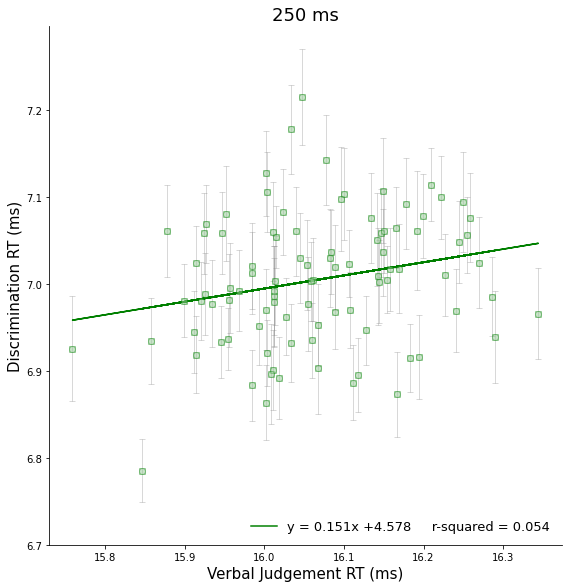

In [55]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(arr_VE250RT).reshape(-1,1)
y_250 = arr_discrim250RT
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(X_250, y_250,elinewidth=1, ecolor='gray',fmt='or', mfc='white', mec='green', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_250));

plt.plot(X_250, y_250, 's', color='green', alpha = 0.3);
plt.plot(X_250, y_predicted_250,color='green', label = 'y = ' + str(round(reg_250.coef_[0], 3))
        +'x +'+str(round(reg_250.intercept_, 3))  + '     r-squared' + ' = '+ str(round(float(reg_250.score(X_250, y_250)), 3)))

plt.xlabel("Verbal Judgement RT (ms)", fontsize = 15)
plt.ylabel("Discrimination RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

# plt.xticks(np.arange(0.15,1.2, 0.2))
plt.yticks(np.arange(6.7,7.3, .1))

plt.title('250 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))
print(scipy.stats.pearsonr(arr_VE250RT, arr_discrim250RT))

m: [0.10745764]
b: 5.2021423152215185
R-squared:  0.0648099411858919
(0.25457796681152695, 0.013281055454114716)


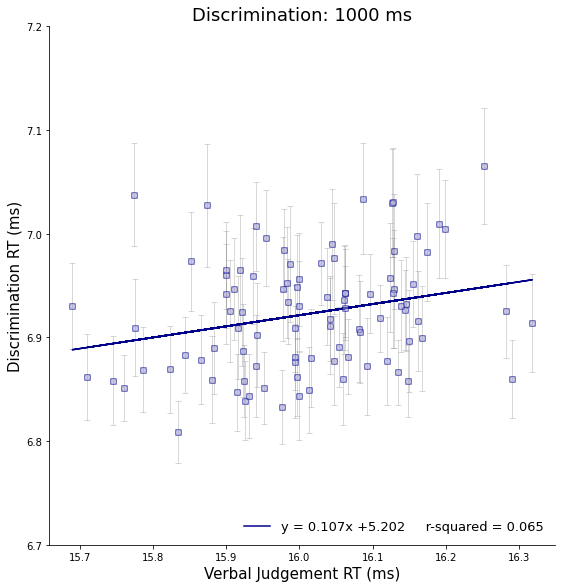

In [17]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(arr_VE1000RT).reshape(-1,1)
y_1000 = arr_discrim1000RT
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values

plt.errorbar(X_1000, y_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='darkblue', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_1000));

plt.plot(X_1000, y_1000, 's', color='darkblue', alpha = 0.3);
plt.plot(X_1000, y_predicted_1000,color='darkblue', label = 'y = ' + str(round(reg_1000.coef_[0], 3))
        +'x +'+str(round(reg_1000.intercept_, 3))  + '     r-squared = '+ str(round(float(reg_1000.score(X_1000, y_1000)), 3)))

plt.xlabel("Verbal Judgement RT (ms)", fontsize = 15)
plt.ylabel("Discrimination RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

plt.yticks(np.arange(6.7,7.3, .1))

plt.title('Discrimination: 1000 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))
print(scipy.stats.pearsonr(arr_VE1000RT, arr_discrim1000RT))

                 Discrim 250 RT  Discrim 1000 RT  VE 250 RT  VE 1000 RT
Discrim 250 RT         1.000000         0.550691   0.231853    0.175159
Discrim 1000 RT        0.550691         1.000000   0.223076    0.254578
VE 250 RT              0.231853         0.223076   1.000000    0.071603
VE 1000 RT             0.175159         0.254578   0.071603    1.000000


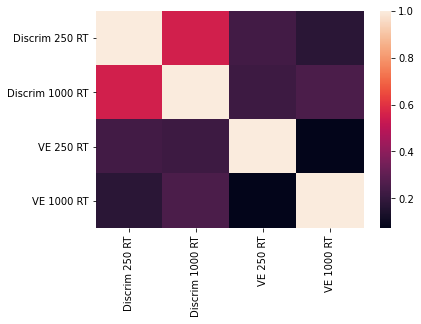

In [56]:
import pandas as pd

data = {'Discrim 250 RT': arr_discrim250RT,
        'Discrim 1000 RT': arr_discrim1000RT,
        'VE 250 RT': arr_VE250RT,
        'VE 1000 RT': arr_VE1000RT
        }

df = pd.DataFrame(data,columns=['Discrim 250 RT','Discrim 1000 RT','VE 250 RT', 'VE 1000 RT'])

sns.heatmap(df.corr());

print(df.corr())



## Complete 8x8 Matrix Comparisons

                 Discrim_PC_250  Discrim_PC_1000  VE_PC_250  VE_PC_1000  \
Discrim_PC_250         1.000000         0.718103   0.563954    0.599037   
Discrim_PC_1000        0.718103         1.000000   0.589019    0.694674   
VE_PC_250              0.563954         0.589019   1.000000    0.794817   
VE_PC_1000             0.599037         0.694674   0.794817    1.000000   
Discrim 250 RT        -0.632814        -0.635273  -0.609608   -0.600770   
Discrim 1000 RT       -0.493491        -0.549597  -0.465501   -0.446248   
VE 250 RT             -0.137628        -0.126724  -0.108605   -0.153899   
VE 1000 RT            -0.066903        -0.020847  -0.054088   -0.009891   

                 Discrim 250 RT  Discrim 1000 RT  VE 250 RT  VE 1000 RT  
Discrim_PC_250        -0.632814        -0.493491  -0.137628   -0.066903  
Discrim_PC_1000       -0.635273        -0.549597  -0.126724   -0.020847  
VE_PC_250             -0.609608        -0.465501  -0.108605   -0.054088  
VE_PC_1000            -0.600

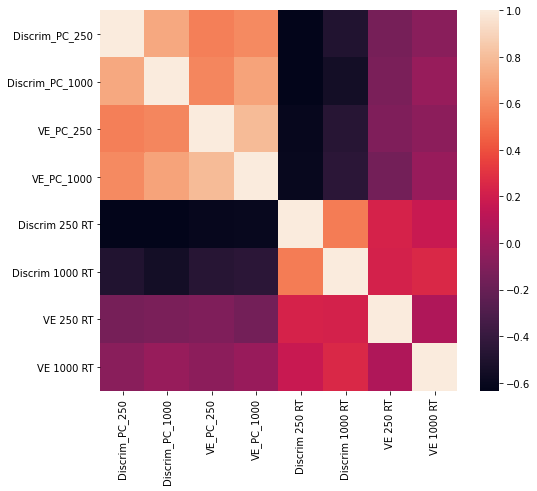

In [76]:
import pandas as pd

plt.figure(figsize=[8,7])

data = {'Discrim_PC_250': all_Discrim_VE_PC_250,
        'Discrim_PC_1000': all_Discrim_VE_PC_1000,
        'VE_PC_250': all_VE_PC_250,
        'VE_PC_1000': all_VE_PC_1000,
        'Discrim 250 RT': arr_discrim250RT,
        'Discrim 1000 RT': arr_discrim1000RT,
        'VE 250 RT': arr_VE250RT,
        'VE 1000 RT': arr_VE1000RT
        }

df = pd.DataFrame(data,columns=['Discrim_PC_250','Discrim_PC_1000','VE_PC_250', 'VE_PC_1000',
                                'Discrim 250 RT','Discrim 1000 RT','VE 250 RT', 'VE 1000 RT'])

sns.heatmap(df.corr());

print(df.corr())

                Discrim_PC_250  VE_PC_250  Discrim 250 RT  VE 250 RT
Discrim_PC_250        1.000000   0.563954       -0.632814  -0.137628
VE_PC_250             0.563954   1.000000       -0.609608  -0.108605
Discrim 250 RT       -0.632814  -0.609608        1.000000   0.231853
VE 250 RT            -0.137628  -0.108605        0.231853   1.000000


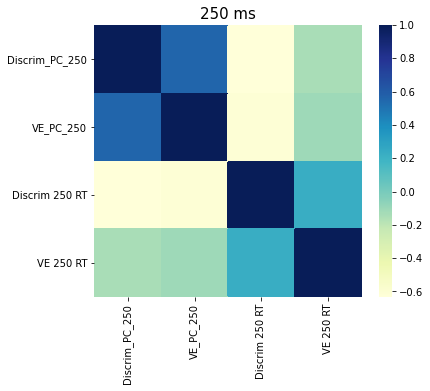

In [73]:
import pandas as pd

plt.figure(figsize=[6,5])

data = {'Discrim_PC_250': all_Discrim_VE_PC_250,
        'VE_PC_250': all_VE_PC_250,
        'Discrim 250 RT': arr_discrim250RT,
        'VE 250 RT': arr_VE250RT
        }

df = pd.DataFrame(data,columns=['Discrim_PC_250','VE_PC_250',
                                'Discrim 250 RT','VE 250 RT'])
plt.title('250 ms', fontsize=15)

sns.heatmap(df.corr(), cmap="YlGnBu");

print(df.corr())

                 Discrim_PC_1000  VE_PC_1000  Discrim 1000 RT  VE 1000 RT
Discrim_PC_1000         1.000000    0.694674        -0.549597   -0.020847
VE_PC_1000              0.694674    1.000000        -0.446248   -0.009891
Discrim 1000 RT        -0.549597   -0.446248         1.000000    0.254578
VE 1000 RT             -0.020847   -0.009891         0.254578    1.000000


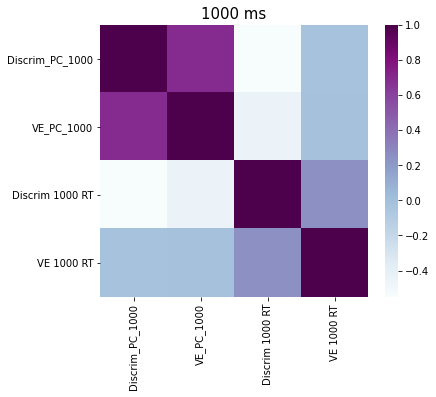

In [75]:
import pandas as pd

plt.figure(figsize=[6,5])

data = {'Discrim_PC_1000': all_Discrim_VE_PC_1000,
        'VE_PC_1000': all_VE_PC_1000,
        'Discrim 1000 RT': arr_discrim1000RT,
        'VE 1000 RT': arr_VE1000RT
        }

df = pd.DataFrame(data,columns=['Discrim_PC_1000','VE_PC_1000',
                                'Discrim 1000 RT','VE 1000 RT'])
plt.title('1000 ms', fontsize=15)

sns.heatmap(df.corr(), cmap="BuPu");

print(df.corr())